# Implementing UMAP without Autoencoders

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/Users/nethanshaik/Desktop/final_year_project/project/dl-on-multiomics/Combined_Omics_Mutated_Genes_Dataset.csv')

In [3]:
data.head()

,Unnamed: 0,GE_FOXA1,GE_BRAF,GE_SPOP,GE_NKX3-1,GE_ZMYM3,GE_ATM,GE_CTNNB1,CNA_FOXA1,CNA_BRAF,...,MutSig_(Q-value)_TP53,MutSig_(Q-value)_SPOP,MutSig_(Q-value)_FOXA1,Mut_TP53,Mut_SPOP,Mut_FOXA1,Freq_TP53,Freq_SPOP,Freq_FOXA1,Gleason_Score
0,0,0.684537,0.401258,0.432423,0.576310,0.710846,0.487204,0.822607,0.370714,0.220151,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
1,1,0.593167,0.370666,0.651981,0.697055,0.645458,0.426688,0.781097,0.354495,0.204106,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
2,2,0.687300,0.405120,0.258006,0.582047,0.787792,0.603989,0.757727,0.358202,0.204342,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0
3,3,0.379166,0.169027,0.509185,0.622602,0.598594,0.175336,0.705212,0.351251,0.207645,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,1
4,4,0.555879,0.290225,0.409782,0.722197,0.757623,0.531428,0.745461,0.358202,0.207645,...,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0.003448,0


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.head()
data.shape

(290, 32)

In [6]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [7]:
x.shape

(290, 31)

In [8]:
y.shape

(290,)

In [9]:
from umap import UMAP
import matplotlib.pyplot as plt

In [10]:
umap_model = UMAP(n_neighbors=10,min_dist=0.03,n_components=2,metric='euclidean',random_state=42)
x_umap = umap_model.fit_transform(x)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


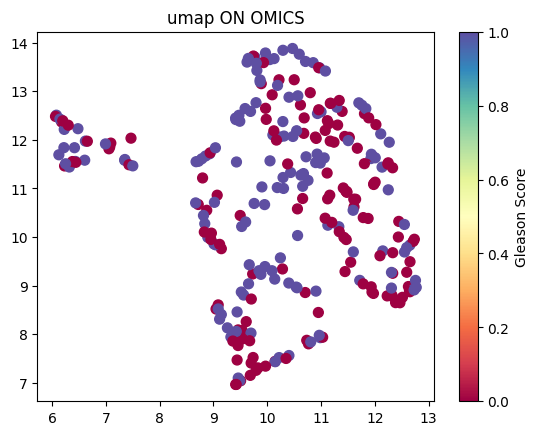

In [11]:
plt.scatter(x_umap[:,0], x_umap[:, 1], c=data['Gleason_Score'], cmap='Spectral',s=50)
plt.title('umap ON OMICS')
plt.colorbar(label = 'Gleason Score')
#plt.legend()
plt.show()

# Visualizing in 3D (Optional)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


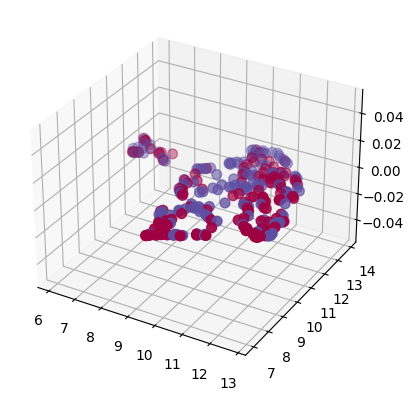

In [12]:
umap_model_3d = UMAP(n_neighbors=10,min_dist=0.03,n_components=3,random_state=42)
x_umap_3d = umap_model.fit_transform(x)

from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#plt.scatter(x_umap[:,0], x_umap[:, 1], c=data['Gleason_Score'], cmap='Spectral',s=50)
ax.scatter(x_umap_3d[:,0], x_umap_3d[:, 1], c=data['Gleason_Score'], cmap='Spectral',s=50)
plt.show()

# Visualizing in 3D Plotly (Optional)

In [13]:
!pip install plotly

In [13]:
print(x_umap.shape)

(290, 2)


In [14]:
import plotly.express as px
import umap
import pandas as pd

# Assuming 'x' is your normalized data and 'data['Gleason_Score']' contains your class labels
umap_model_3d = umap.UMAP(n_neighbors=10, min_dist=0.03, n_components=3, random_state=42)
x_umap_3d = umap_model_3d.fit_transform(x)

'''# Create a DataFrame to store UMAP components and labels
df = pd.DataFrame({
    'UMAP1': x_umap_3d[:, 0],
    'UMAP2': x_umap_3d[:, 1],
    'UMAP3': x_umap_3d[:, 2],
    'Gleason_Score': data['Gleason_Score']  # assuming Gleason_Score is part of 'data'
})'''

# Use plotly to create an interactive 3D scatter plot
fig = px.scatter_3d(
    x_umap_3d,
    x=x_umap_3d[:,0],
    y=x_umap_3d[:,1],
    z=x_umap_3d[:,2],
    color=data['Gleason_Score'],  # Color points based on Gleason_Score
    title="Interactive 3D UMAP Plot",
    labels={'color': 'Gleason Score'},
    opacity=0.8,
    color_continuous_scale='Spectral'  # Same color map as your Matplotlib version
)

# Show the plot
fig.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


---

# Implementing Decision Tree, Logistic Regression and Random Forest directly after using UMAP

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train-test-validation split: 70-20-10

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x_umap, y, test_size = 0.3, random_state = 42)

In [17]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.33, random_state = 42 )

In [18]:
classifier = DecisionTreeClassifier(random_state=42)
log_regr = LogisticRegression(random_state=42)

In [19]:
classifier.fit(x_train,y_train)
log_regr.fit(x_train,y_train)

LogisticRegression(random_state=42)

In [20]:
y_pred_validation = classifier.predict(x_val)
y_pred_log = log_regr.predict(x_val)

In [21]:
#comparision of validation between decision trees and logistic regression
print("Decision Tree")
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_validation):.2f}")
print(f"Validation Classification Report:\n{classification_report(y_val, y_pred_validation)}")

print("Logistic Regression")
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred_log):.2f}")
print(f"Validation Classification Report:\n{classification_report(y_val, y_pred_log)}")

Decision Tree
Validation Accuracy: 0.72
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        12
           1       0.91      0.59      0.71        17

    accuracy                           0.72        29
   macro avg       0.76      0.75      0.72        29
weighted avg       0.79      0.72      0.72        29

Logistic Regression
Validation Accuracy: 0.59
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.67      0.57        12
           1       0.69      0.53      0.60        17

    accuracy                           0.59        29
   macro avg       0.60      0.60      0.59        29
weighted avg       0.61      0.59      0.59        29



In [22]:
# Final evaluation on the test set between decision tree and logistic regression
y_test_pred = classifier.predict(x_test)
y_test_log = log_regr.predict(x_test)
print("Decision Tree")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
print(f"Test Classification Report:\n{classification_report(y_test, y_test_pred)}")

print("Logistic Regression")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_log):.2f}")
print(f"Test Classification Report:\n{classification_report(y_test, y_test_log)}")

Decision Tree
Test Accuracy: 0.71
Test Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.66      0.71        32
           1       0.65      0.77      0.70        26

    accuracy                           0.71        58
   macro avg       0.71      0.71      0.71        58
weighted avg       0.72      0.71      0.71        58

Logistic Regression
Test Accuracy: 0.60
Test Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        32
           1       0.54      0.73      0.62        26

    accuracy                           0.60        58
   macro avg       0.62      0.62      0.60        58
weighted avg       0.63      0.60      0.60        58



# Confusion Matrix for Decision Trees only

In [23]:
import seaborn as sns
conf_matrx = confusion_matrix(y_test, y_test_pred)

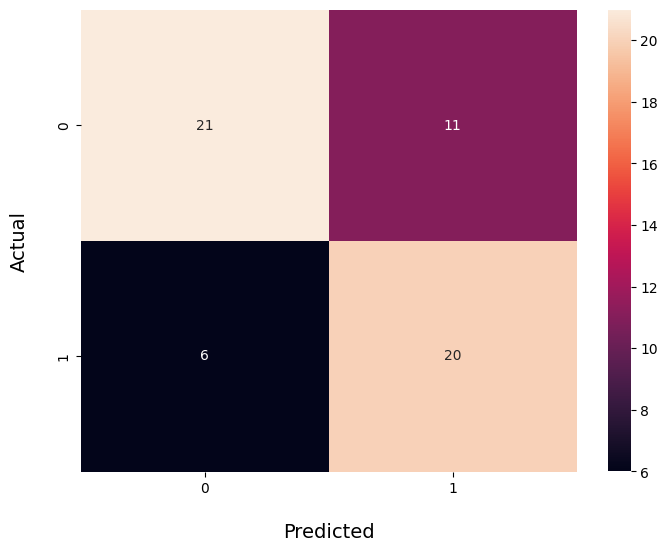

In [24]:
plt.figure(figsize=(8,6), dpi=100)
ax = sns.heatmap(conf_matrx, annot=True, fmt='d')
ax.set_xlabel("Predicted", fontsize = 14, labelpad=20)
ax.xaxis.set_ticklabels(['0','1'])
ax.set_ylabel("Actual", fontsize = 14, labelpad=20)
ax.xaxis.set_ticklabels(['0','1'])
plt.show()

# Random Forest

In [25]:
rand_for = RandomForestClassifier(random_state = 42)

In [26]:
rand_for.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
rand_for_y_pred_val = rand_for.predict(x_val)
rand_fo_y_pred_test = rand_for.predict(x_test)

In [28]:
print("Random Forest Validation")
print(f"Validation Accuracy: {accuracy_score(y_val, rand_for_y_pred_val):.2f}")
print(f"Validation Classification Report:\n{classification_report(y_val, rand_for_y_pred_val)}")

print("Random Forest Test")
print(f"Test Accuracy: {accuracy_score(y_test, rand_fo_y_pred_test):.2f}")
print(f"TestClassification Report:\n{classification_report(y_test, rand_fo_y_pred_test)}")

Random Forest Validation
Validation Accuracy: 0.62
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        12
           1       0.75      0.53      0.62        17

    accuracy                           0.62        29
   macro avg       0.64      0.64      0.62        29
weighted avg       0.66      0.62      0.62        29

Random Forest Test
Test Accuracy: 0.64
TestClassification Report:
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        32
           1       0.58      0.69      0.63        26

    accuracy                           0.64        58
   macro avg       0.64      0.64      0.64        58
weighted avg       0.65      0.64      0.64        58



# Implementing ANN

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [30]:
print(x_umap.shape)

(290, 2)


In [31]:
classifier_ann = Sequential()
classifier_ann.add(Dense(10,kernel_initializer='uniform', activation = 'relu', input_dim=2))
#classifier_ann.add(Dropout(0.5))
classifier_ann.add(Dense(10,kernel_initializer='uniform',activation = 'relu'))
classifier_ann.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#classifier_ann.add(Dropout(0.5))
classifier_ann.compile(optimizer=Adam(learning_rate=0.1),loss='binary_crossentropy',metrics='accuracy')
classifier_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 151 (604.00 Byte)
Trainable params: 151 (604.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
classifier_ann.fit(x_train,y_train,batch_size=19, epochs=1000, validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 1s 17ms/step - loss: 0.7017 - accuracy: 0.5309 - val_loss: 0.7471 - val_accuracy: 0.3902
Epoch 2/1000
9/9 [==============================] - 0s 3ms/step - loss: 0.7070 - accuracy: 0.4198 - val_loss: 0.6880 - val_accuracy: 0.6098
Epoch 3/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.4877 - val_loss: 0.7036 - val_accuracy: 0.3902
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6922 - accuracy: 0.5247 - val_loss: 0.7141 - val_accuracy: 0.3902
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.6933 - accuracy: 0.5247 - val_loss: 0.7118 - val_accuracy: 0.3902
Epoch 6/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.5247 - val_loss: 0.7146 - val_accuracy: 0.3902
Epoch 7/1000
9/9 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5247 - val_loss: 0.6968 - val_accuracy: 0.3902
Epoch 8/1000
9/9 [=

In [33]:
prediction = classifier_ann.predict(x_test)

2/2 [==============================] - 0s 2ms/step


In [34]:
# Predicting on the test set
y_pred = classifier_ann.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary class labels (0 or 1)

# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


2/2 [==============================] - 0s 1ms/step
Accuracy: 0.5517241379310345
